Reference links:

https://www.residentmar.io/2016/06/12/null-and-missing-data-python.html

https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

In [2]:
import pandas as pd
import numpy as np


Missing data present various problems. First, the absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false. Second, the lost data can cause bias in the estimation of parameters. Third, it can reduce the representativeness of the samples. Fourth, it may complicate the analysis of the study. Each of these distortions may threaten the validity of the trials and can lead to invalid conclusions.

Data unavailability is categorised in two :
1). Missing Data
2). Non-data

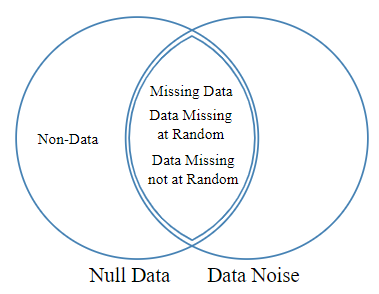

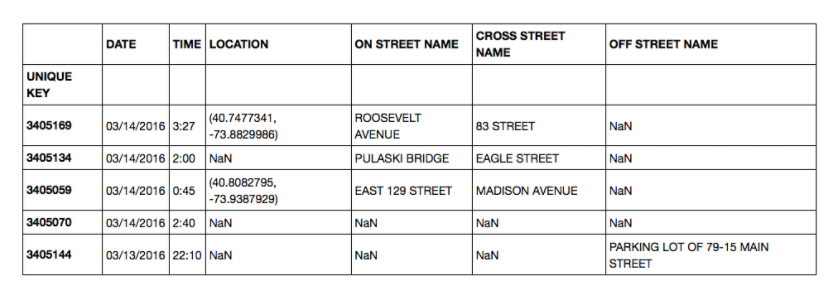


Missing Data :
Data that we know exists, but which, due to sparse or incomplete data collection, we do not actually know the value of.
like Location column in above dataset has to provide the coordinates the accident took place but is missing becoz of ireguarities in collection of data.
Missing data, meanwhile, is a question of actionability

Two types of missing data:
1). Data missing at random :
is a nullity pattern which occurs randomly.For example, in the motor vehicle collision dataset above we may reasonably assume that observations missing collision streetnames are randomly distributed throughout . In the simple case of having a sufficiently large number of observations for such data to be statistically irrelevant, you can safely drop these observations using e.g. pd.DataFrame.drop().
2). data not missing at random :
For example, for the motor vehicle collision dataset I discovered that NYPD officers merely provide streetnames in their collision reports—the LOCATION column is geocoded from there. Since ROOSEVELT AVENUE AND 83 STREET is far easier to geocode than PARKING LOT OF 79-15 MAIN STREET is, off-street collisions are missing coordinate data at a higher rate than on-street collisions, a difference in nullity pattern which absolutely must be taken into account in interpreting the dataset as a whole.
And when you know or have reason to believe that data is not missing at random, dropping the data and modeling what's left would result in falsehoods

Non data :
A collision location is recorded as a combination of ON STREET and CROSS STREET in incidents in which cars collide mid-street or mid-avenue. But not all collisions occur on streets; some occur OFF STREET, like, say, in parking lots.
Then the other columns don't carry any informational content at all. They exemplify non-data
Non-data isn't erroneous

R is the only programming language which handles null semantics with what is known as a true NA. In R there is a distinction between null values and NA values, allowing R users to easily implement the distinction between missing data and non-data with very little mental overhead.

Most every other programming language, Python included, has only a single null datatype: None (or float.NaN) in Python. This means that Python programs have to virtualize NA ourselves somehow. Generally speaking there are two ways of doing this.

1). Use a sentinel value (Identifying NaN) :
a special bit pattern in the data column's native type flagging a missing value. This is a traditional way of indicating missing data—recording unknown income as -99 or an unknown year as 0
Drawbacks:
The trouble is that sentinal values are in no way durable. -99 could be a valid year and 0 could be a valid income! Without a special reserved keyword, a sentinel robs you of a value that you might otherwise want to use. They have to be considered on a case-by-case, column-by-column basis, a burdensome thing.

2).The second method is to use a mask (Identifying NaN) :
a separate boolean array to "mask" the data whenever missing data needs to be represented. The advantage here is that since your nullity pattern is encoded (quite literally) in a whole second array you don't need to reserve any representations in your core data, meaning that this design pattern is more robust:
Drawbacks:
The disadvantage is that now you've got a whole second object to tend to—trading complexity and performance for durability.

3). Dropping rows with null values (data-dropping methods) :
This is an acceptable solution if we are confident that the missing data in the dataset is missing at random, and if the number of data points we have access to is sufficiently high that dropping some of them will not cause us to lose generalizability in the models we build
Drawbacks:
Dropping data missing not at random is dangerous. It will result in significant bias in your model in cases where data being absent corresponds with some real-world phenomenon. Because this requires domain knowledge, usually the only way to determine if this is a problem is through manual inspection

4). Dropping features with high nullity (data-dropping methods) :
A feature that has a high number of empty values is unlikely to be very useful for prediction. It can often be safely dropped. For example in the beer dataset I would drop PrimingMethod and PrimingAmount; and consider dropping a couple of others as well.
Drawbacks:
Dropping rare features simplifies your model, but obviously gives you fewer features to work with. Before dropping features outright, consider subsetting the part of the dataset that this value is available for and checking its feature importance when it is used to train a model in this subset. If in doing so you disover that the variable is important in the subset it is defined, consider making an effort to retain it.

5). Mean or median or other summary statistic substitution ( imputation method) :
Drawbacks:
However, with missing values that are not strictly random, especially in the presence of a great inequality in the number of missing values for the different variables, the mean substitution method may lead to inconsistent bias. Furthermore, this approach adds no new information but only increases the sample size and leads to an underestimate of the errors [11]. Thus, mean substitution is not generally accepted.

6). Regression/ Model Imputing :
we can fix missing values by applying machine learning to that dataset! If we consider a column with missing data as our target variable, and existing columns with complete data as our predictor variables, then we may construct a machine learning model using complete records as our train and test datasets and the records with incomplete data as our generalization target. This is a fully scoped-out machine learning problem.
 if a column value cannot be determined with any accuracy from another columns in the dataset. if none of the variables in the dataset predict column value, then that column value is useless for predicting any other feature .
Drawbacks:
However, as in a mean substitution, while a regression imputation substitutes a value that is predicted from other variables, no novel information is added, while the sample size has been increased and the standard error is reduced.

6) Multiple imputation :
Most preferred way of imputation . Refer https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation for more.

One has to be mindful that in Python (and NumPy), the nan's don’t compare equal, but None's do. Note that pandas/NumPy uses the fact that np.nan != np.nan, and treats None like np.nan.

In [3]:
train = pd.read_csv(r'D:\datasets\Titianic\train.csv')


In [18]:

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
#Age - Null Check
#Checking nan values to classify it as non data / missing
#it seems missing data as seeing the data seems like loosing data/ unavailability of data during collection
#under missing data, it shall come under Data "missing at random(MAR) as seeing the data does not resemble any pattern"
#Age seems to be decisive feature using coorelation matrix so cannot be dropped
#177 out of total records seems to be lot of records, dropping the null rows is also a bad idea
dfage = train.copy()

#Gives the total count of records
dfage.isnull().count()

print("Percentage of nullity \n",dfage.isna().sum()/dfage.isnull().count()*100)


Percentage of nullity 
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [52]:
#can first try mean imputation method
agemean = dfage.Age.loc[dfage.Age.notnull()].mean()
dfage.Age = dfage.Age.fillna(agemean)
dfage.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
#Embarked
dfemb = train.copy()

#what percentage of nulltity exist in Embarked
print("percentage\n",dfemb.Embarked.isna().sum()/dfemb.Embarked.isna().count()*100)

#view the null rows
dfemb2 = dfemb[dfemb.Embarked.isna()]
dfemb2

# Em

percentage
 0.22446689113355783


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
